# Business Problem
***

### Electricity Theft Detection

- A machine learning pipeline to predict electricity theft using consumption patterns, voltage data, and customer attributes.

### Key Features

- **Data Preprocessing :** feature engineering, and scaling.
  
- **Model Training :** Includes `LinearRegression`, `SVM`, `KNN`, `DecisionTree`, `RandomForest`, `AdaBoost`, `GradientBoost` and `XGBoost` with `hyperparameter tuning`.

# Import Libraries
***

- **Data Handling**

In [1]:
import pandas as pd
import numpy as np

- **Visualization**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

- **Warnings Handling**

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading
***

In [4]:
df = pd.read_csv('electricity_theft_dataset.csv')

- Reading CSV file of electricity_theft_dataset

In [5]:
pd.set_option('display.max_columns', None)

- To read all colimns

# Data preprocessing
***

### Data Exploration

In [6]:
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,customer_id,month,billed_consumption,actual_consumption,average_voltage,peak_usage_time,peak_time_consumption,off_peak_consumption,power_factor,payment_history,num_outages,customer_type,location,theft_detected
0,1001,2024-04,524,903.59,183.11,22:09,452.24,451.35,0.98,Good,2,Residential,urban,1
1,1002,2024-05,261,265.29,211.88,10:36,79.04,186.25,0.94,Good,0,Industrial,suburban,0
2,1003,2024-05,434,443.71,207.57,16:49,187.58,256.12,1.11,Good,3,Commercial,rural,0
3,1004,2024-09,546,889.49,228.48,19:46,374.34,515.15,0.89,Poor,1,Industrial,suburban,1
4,1005,2024-11,246,336.29,264.81,16:43,150.24,186.05,1.15,Poor,5,Commercial,suburban,1


- To read first 5 rows

In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (100000, 14)


- Shape of the dataset having **100000 Rows and 14 Columns**

### Check for missing values
- to identify missing(null) values

In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customer_id              0
month                    0
billed_consumption       0
actual_consumption       0
average_voltage          0
peak_usage_time          0
peak_time_consumption    0
off_peak_consumption     0
power_factor             0
payment_history          0
num_outages              0
customer_type            0
location                 0
theft_detected           0
dtype: int64


- No missing values are there in this dataset

### check for duplicate
- to check if there are any duplicate row in the dataset

In [9]:
df.duplicated().sum()

np.int64(0)

- No duplicates in this dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            100000 non-null  int64  
 1   month                  100000 non-null  object 
 2   billed_consumption     100000 non-null  int64  
 3   actual_consumption     100000 non-null  float64
 4   average_voltage        100000 non-null  float64
 5   peak_usage_time        100000 non-null  object 
 6   peak_time_consumption  100000 non-null  float64
 7   off_peak_consumption   100000 non-null  float64
 8   power_factor           100000 non-null  float64
 9   payment_history        100000 non-null  object 
 10  num_outages            100000 non-null  int64  
 11  customer_type          100000 non-null  object 
 12  location               100000 non-null  object 
 13  theft_detected         100000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
me

### Dataset information
- **100000 rows** with **14 columns**.
  
- The columns has no missing values(already we seen this one).

- All the data types are correct except date-time.

- Mixed data types: **categorical** (object), **numerical** (int/float) and we want to convert some column to **date-time** also.

### Check the column names

In [11]:
df.columns

Index(['customer_id', 'month', 'billed_consumption', 'actual_consumption',
       'average_voltage', 'peak_usage_time', 'peak_time_consumption',
       'off_peak_consumption', 'power_factor', 'payment_history',
       'num_outages', 'customer_type', 'location', 'theft_detected'],
      dtype='object')

- all columns are in perfect way

### checking the all columns unique values

In [12]:
df['customer_id'].nunique() # Drop

100000

- In this feature all are unique, there is no use, **Drop this feature**

In [13]:
df['month'].unique()

array(['2024-04', '2024-05', '2024-09', '2024-11', '2024-02', '2024-08',
       '2024-03', '2024-06', '2024-01', '2024-07', '2024-12', '2024-10'],
      dtype=object)

- want to convert into datetime

In [14]:
df['billed_consumption'].unique()

array([524, 261, 434, 546, 246, 381, 402, 562, 302, 309, 284, 354, 173,
       391, 159, 205, 482, 174, 369, 559, 339, 330, 301, 406, 582, 311,
       483, 395, 312, 575, 515, 472, 233, 510, 160, 271, 251, 235, 240,
       183, 512, 348, 465, 418, 199, 554, 415, 243, 591, 548, 161, 198,
       281, 297, 469, 409, 193, 288, 201, 531, 292, 299, 536, 572, 158,
       252, 399, 293, 264, 426, 227, 197, 286, 226, 195, 294, 150, 356,
       340, 383, 317, 241, 454, 446, 319, 361, 266, 203, 344, 295, 496,
       310, 595, 435, 155, 499, 290, 282, 400, 441, 329, 567, 213, 467,
       332, 389, 419, 228, 250, 516, 326, 450, 522, 520, 269, 156, 534,
       502, 574, 212, 181, 291, 285, 163, 491, 384, 568, 466, 207, 376,
       333, 184, 347, 289, 573, 323, 315, 497, 593, 424, 448, 370, 325,
       176, 165, 556, 342, 565, 408, 254, 373, 508, 365, 378, 192, 473,
       349, 152, 504, 460, 581, 420, 403, 172, 280, 208, 279, 357, 558,
       209, 188, 336, 585, 551, 555, 489, 346, 225, 447, 407, 55

In [15]:
df['billed_consumption'].nunique()

451

In [16]:
df['actual_consumption'].unique()

array([903.59, 265.29, 443.71, ..., 143.02, 739.75, 658.35])

In [17]:
df['actual_consumption'].nunique()

53412

In [18]:
df['average_voltage'].unique()

array([183.11, 211.88, 207.57, ..., 266.05, 266.57, 174.54])

In [19]:
df['average_voltage'].nunique()

9297

In [20]:
df['peak_usage_time'].unique()

array(['22:09', '10:36', '16:49', ..., '20:11', '17:01', '03:48'],
      dtype=object)

In [21]:
df['peak_usage_time'].nunique()

1440

In [22]:
df['peak_time_consumption'].unique()

array([452.24,  79.04, 187.58, ..., 328.04, 200.34,  71.77])

In [23]:
df['peak_time_consumption'].nunique()

31676

In [24]:
df['off_peak_consumption'].unique()

array([451.35, 186.25, 256.12, ..., 110.87,  71.24, 190.98])

In [25]:
df['off_peak_consumption'].nunique()

40658

In [26]:
df['power_factor'].unique()

array([0.98, 0.94, 1.11, 0.89, 1.15, 0.71, 0.87, 0.77, 0.99, 0.81, 0.95,
       0.88, 0.93, 0.76, 0.84, 0.86, 1.1 , 0.91, 0.69, 1.  , 0.83, 0.9 ,
       0.72, 0.66, 0.73, 0.82, 0.85, 0.74, 1.13, 0.8 , 1.05, 0.7 , 0.79,
       0.97, 1.01, 1.09, 1.04, 0.75, 1.02, 1.12, 0.92, 0.68, 0.96, 1.03,
       1.08, 0.78, 1.16, 1.17, 0.67, 1.07, 0.65, 1.06, 1.14, 1.18, 1.19,
       0.64, 1.2 ])

In [27]:
df['payment_history'].unique()

array(['Good', 'Poor'], dtype=object)

In [28]:
df['num_outages'].unique()

array([2, 0, 3, 1, 5, 4])

In [29]:
df['customer_type'].unique()

array(['Residential', 'Industrial', 'Commercial'], dtype=object)

In [30]:
df['location'].unique()

array(['urban', 'suburban', 'rural'], dtype=object)

In [31]:
df['theft_detected'].unique()

array([1, 0])

- After seeing all columns unique values, **There is no wrong data**

### Basic statistics

In [32]:
print("\nDescriptive statistics:")
display(df.describe())


Descriptive statistics:


,customer_id,billed_consumption,actual_consumption,average_voltage,peak_time_consumption,off_peak_consumption,power_factor,num_outages,theft_detected
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,51000.500000,374.94456,490.290328,220.219537,195.880607,294.409727,0.899846,2.506990,0.501900
std,28867.657797,129.90265,183.835252,25.533873,83.017190,117.035358,0.118991,1.706025,0.499999
min,1001.000000,150.00000,105.850000,173.640000,31.830000,52.430000,0.640000,0.000000,0.000000
25%,26000.750000,263.00000,356.760000,198.200000,134.700000,208.317500,0.810000,1.000000,0.000000
50%,51000.500000,375.00000,482.820000,220.380000,187.150000,286.750000,0.900000,3.000000,1.000000
75%,76000.250000,487.00000,615.292500,242.350000,247.530000,370.782500,0.990000,4.000000,1.000000
max,101000.000000,600.00000,1056.270000,267.550000,596.590000,768.290000,1.200000,5.000000,1.000000


- In this we can see complete Descriptive statistics(min, max, mean, etc..)

**Class distribution**
- The bar plot below shows the distribution of the target variable (theft_detected) in the dataset

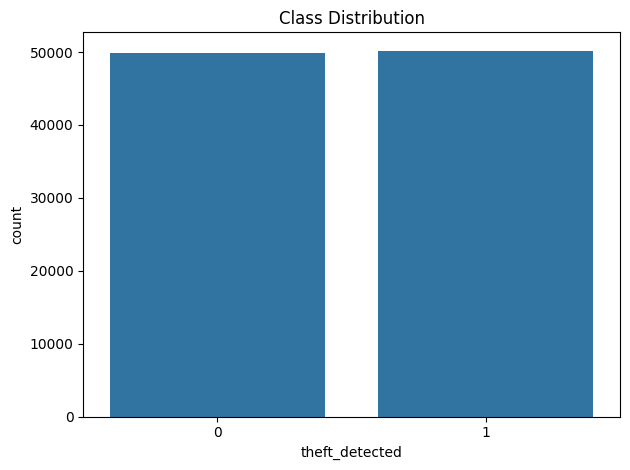

In [33]:
# Plot 1: Class distribution
sns.countplot(x='theft_detected', data=df)
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

- From the plot, we can see that the **dataset is balanced** with nearly equal counts for both the classes. (around 50,000 each)

- This balance is important because it ensures that the machine learning model will **not be biased towards one class.**

# Data Cleaning

In [34]:
df.drop(columns=['customer_id'],inplace=True)

- Drop the **customer_id** column

# Feature Engineering
- **Create new features**

In [35]:
# Create new features
df['consumption_diff'] = df['actual_consumption'] - df['billed_consumption']
df['consumption_ratio'] = df['actual_consumption'] / df['billed_consumption']
df['peak_offpeak_ratio'] = df['peak_time_consumption'] / df['off_peak_consumption']

- **consumption_diff** is difference between the actual consumption and billed consumption. (Helps identify errors or mismatches in billing)

- **consumption_ratio** is ratio of actual consumption to billed consumption. (Detects overbilling(>1) or underbilling(<1))

- **peak_offpeak_ratio** is raio of consumption during peak hours to consumption during off-peak hours. (indicates customer`s tendency to use electricity during costly peak hours)

In [36]:
df['peak_hour'] = pd.to_datetime(df['peak_usage_time']).dt.hour

- Extract hour from peak_usage_time

In [37]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['peak_hour'].apply(get_time_of_day)

**Create time of day categories**

- **morning:** 5 AM - 12 PM

- **afternoon:** 12 PM - 5 PM

- **evening:** 5 PM - 9 PM

- **night:** 9 PM - 5 AM

In [38]:
df.drop('peak_usage_time', axis=1, inplace=True)

- Drop original time column

**Display new features**

In [39]:
print("New features created:")
display(df[['consumption_diff', 'consumption_ratio', 'peak_offpeak_ratio', 'peak_hour', 'time_of_day']].head())

New features created:


,consumption_diff,consumption_ratio,peak_offpeak_ratio,peak_hour,time_of_day
0,379.59,1.724408,1.001972,22,night
1,4.29,1.016437,0.424376,10,morning
2,9.71,1.022373,0.732391,16,afternoon
3,343.49,1.629103,0.726662,19,evening
4,90.29,1.367033,0.807525,16,afternoon


In [40]:
df['month'] = pd.to_datetime(df['month'])

- Convert the month column to datetime

In [41]:
df['month(2024)'] = df['month'].dt.month

- Extract the month from it

In [42]:
df.drop(columns=['month'],inplace=True)

- Drop the month column, because year was 2024 only and we extract the month from that so there is no use by this column

# Feature Encoding
- Convert categorical data into a numerical format

In [43]:
df['payment_history_poor'] = pd.get_dummies(df['payment_history'],dtype=int,drop_first=True)

In [44]:
df.drop(columns=['payment_history'],inplace=True)

- After encoding that column, We want to drop that column

**Import LabelEncoder**

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

**Doing label-encoding**

In [46]:
df['customer_type'] = le.fit_transform(df['customer_type'])

In [47]:
df['location'] = le.fit_transform(df['location'])

In [48]:
df['time_of_day'] = le.fit_transform(df['time_of_day'])

**Display the columns after Encoding**

In [49]:
df.head()

,billed_consumption,actual_consumption,average_voltage,peak_time_consumption,off_peak_consumption,power_factor,num_outages,customer_type,location,theft_detected,consumption_diff,consumption_ratio,peak_offpeak_ratio,peak_hour,time_of_day,month(2024),payment_history_poor
0,524,903.59,183.11,452.24,451.35,0.98,2,2,2,1,379.59,1.724408,1.001972,22,3,4,0
1,261,265.29,211.88,79.04,186.25,0.94,0,1,1,0,4.29,1.016437,0.424376,10,2,5,0
2,434,443.71,207.57,187.58,256.12,1.11,3,0,0,0,9.71,1.022373,0.732391,16,0,5,0
3,546,889.49,228.48,374.34,515.15,0.89,1,1,1,1,343.49,1.629103,0.726662,19,1,9,1
4,246,336.29,264.81,150.24,186.05,1.15,5,0,1,1,90.29,1.367033,0.807525,16,0,11,1


- All categorical columns are encoded to numerical format

In [50]:
continues = ['billed_consumption','actual_consumption','average_voltage','peak_time_consumption','off_peak_consumption',
            'power_factor','consumption_diff','consumption_ratio','peak_offpeak_ratio']

- Separating all continues columns for future purpose

### Check outliers

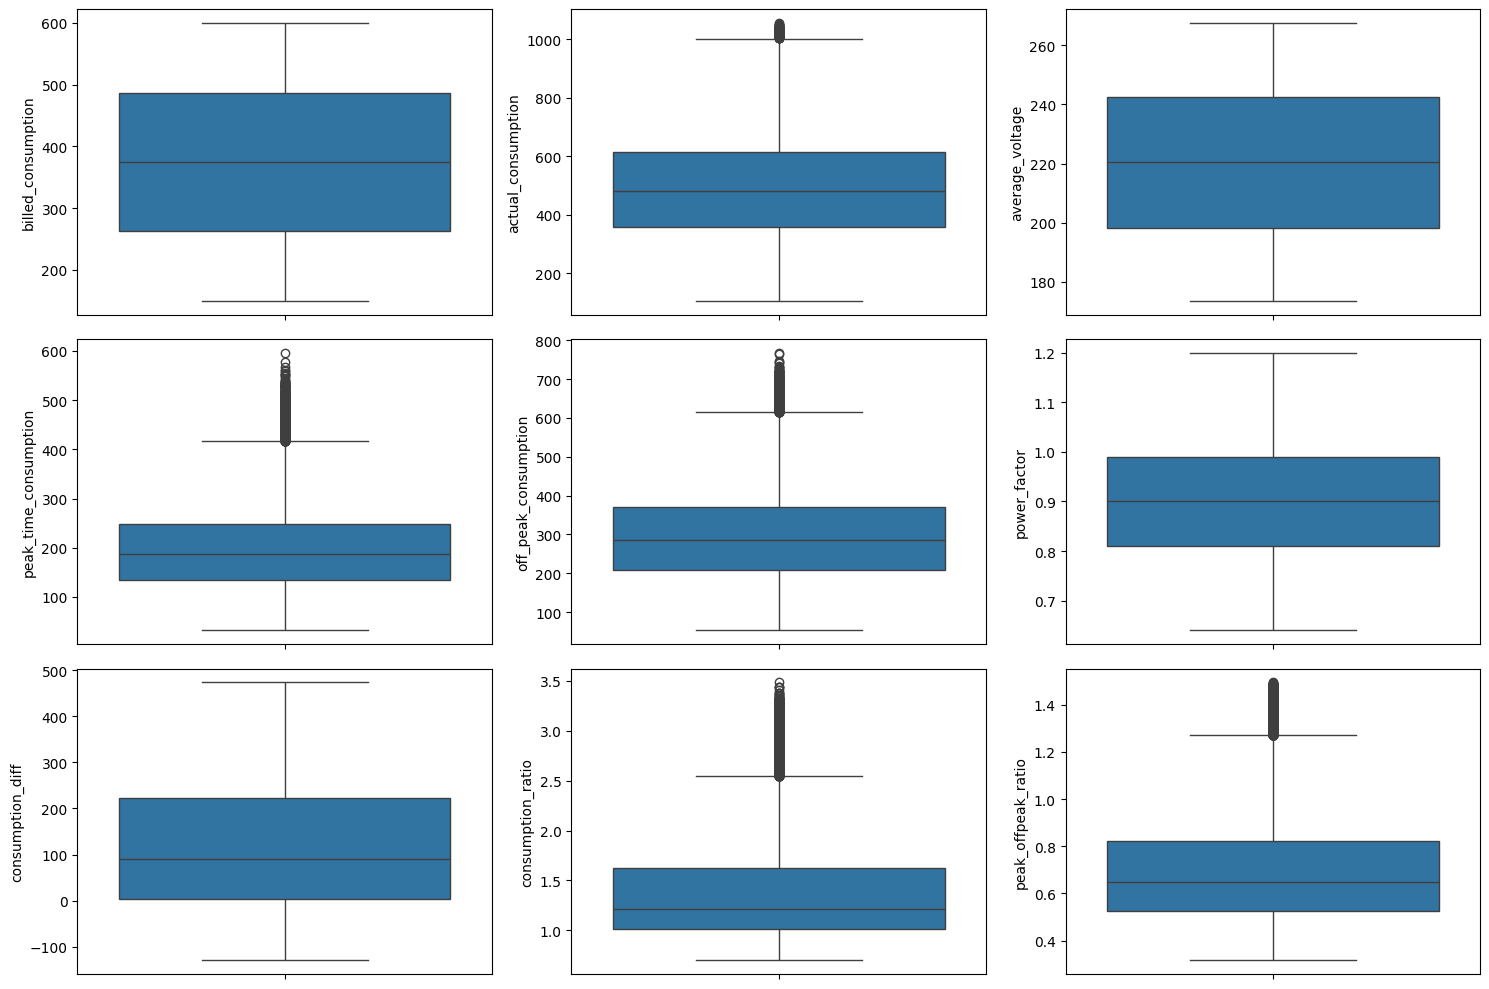

In [51]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.boxplot(df['billed_consumption'])

plt.subplot(3, 3, 2)
sns.boxplot(df['actual_consumption'])

plt.subplot(3, 3, 3)
sns.boxplot(df['average_voltage'])

plt.subplot(3, 3, 4)
sns.boxplot(df['peak_time_consumption'])

plt.subplot(3, 3, 5)
sns.boxplot(df['off_peak_consumption'])

plt.subplot(3, 3, 6)
sns.boxplot(df['power_factor'])

plt.subplot(3, 3, 7)
sns.boxplot(df['consumption_diff'])

plt.subplot(3, 3, 8)
sns.boxplot(df['consumption_ratio'])

plt.subplot(3, 3, 9)
sns.boxplot(df['peak_offpeak_ratio'])

plt.tight_layout()
plt.show()

**Observations:**

- The dataset belongs to the **Energy Theft Detection** domain, where unusual consumption patterns are expected.

- High or low deviations in consumption can represent **genuine cases of theft or abnormal usage**.

- Removing or treating these values as traditional outliers would lead to a **loss of important business signals**.

**Decision:**

- The outliers are **kept as they are** in the dataset.

- They are considered **realistic and meaningful** for this business problem, as they may carry strong indicators of theft-related behavior.


### Skewness check for continuous features

In [52]:
for i in continues:
    print(i,' : ',df[i].skew())

billed_consumption  :  -8.028581203982795e-05
actual_consumption  :  0.2356165981758425
average_voltage  :  -0.010507165144114875
peak_time_consumption  :  0.5939141854851564
off_peak_consumption  :  0.39927549604966134
power_factor  :  0.1436594195037892
consumption_diff  :  0.3651848406528127
consumption_ratio  :  1.0670415851795783
peak_offpeak_ratio  :  0.8121709740320486


- Feature **consumption_ratio** show right skewness

- In the **energy theft detection problem**, skewness is **meaningful and intentional**.

- Unusual values (long tails) often correspond to **suspicious consumption patterns**.

- Therefore, we will **not apply transformations (e.g., log, Box-Cox)** to normalize these features.

- Skewness in this dataset is **not a problem to fix**, but rather a **business-driven insight** that helps differentiate normal from abnormal consumption.


### Observation of skewness and outliers

- But in this business problem, the **skewness and outliers are actually meaningful** — they represent hidden abnormal consumption behaviors that may signal theft.

- By transforming the data, those extreme theft-related patterns would get compressed and start looking like normal consumption.

- This makes it harder for the ML model (or analysis) **to separate normal customers from potential theft cases.**

# Feature Scaling

**Import StandardScaler**

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

**Scaling was done for all continuous features**

In [54]:
for i in continues:
    df[i] = ss.fit_transform(df[[i]])

**After scaling display the data**

In [55]:
df.head()

,billed_consumption,actual_consumption,average_voltage,peak_time_consumption,off_peak_consumption,power_factor,num_outages,customer_type,location,theft_detected,consumption_diff,consumption_ratio,peak_offpeak_ratio,peak_hour,time_of_day,month(2024),payment_history_poor
0,1.147445,2.248218,-1.453353,3.088043,1.340971,0.673619,2,2,2,1,2.039450,0.839275,1.384486,22,3,4,0
1,-0.877158,-1.223930,-0.326608,-1.407434,-0.924167,0.337457,0,1,1,0,-0.857134,-0.768166,-1.201929,10,2,5,0
2,0.454615,-0.253382,-0.495405,-0.099987,-0.327165,1.766147,3,0,0,0,-0.815302,-0.754688,0.177331,16,0,5,0
3,1.316804,2.171519,0.323512,2.149679,1.886108,-0.082746,1,1,1,1,1.760829,0.622884,0.151677,19,1,9,1
4,-0.992630,-0.837713,1.746335,-0.549776,-0.925876,2.102309,5,0,1,1,-0.193382,0.027857,0.513772,16,0,11,1


**Check class distribution**

In [56]:
print("\nClass distribution (theft_detected):")
print(df['theft_detected'].value_counts())


Class distribution (theft_detected):
theft_detected
1    50190
0    49810
Name: count, dtype: int64


- **1** -> Theft detected
- **0** -> No Theft detected

**checking ratio for theft_detected**

In [57]:
50190/49810

1.0076289901626179

- We calculate the **ratio** between theft(1) and non-theft(0) cases

- This ratio is very close to **1**, which confirms that the dataset is **balanced**.

- This **balance is important** because it ensures that the machine learning model will **not be biased towards one class.**

- So, no resampling techniques (like oversampling/undersampling) are required before training models.

**Spliting the data**

In [58]:
x = df.drop(columns=['theft_detected'])
y = df['theft_detected']

# Models

- **Select Best Random State Number**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [66]:
train = []
test = []
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    l = LogisticRegression()
    l.fit(x_train,y_train)
    train.append(l.score(x_train,y_train))
    test.append(l.score(x_test,y_test))
rs = pd.DataFrame()
rs['train'] = train
rs['test'] = test 

In [67]:
rs = rs[(rs['train']-rs['test']<0.05) & (rs['train']-rs['test']>-0.05)]
rs[rs['test'] == rs['test'].max()]

,train,test
61,0.965013,0.96815


- **61** is the best random state number for this dataset

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=61)

- Split the data by using **61 is the random state number**

# Logestic Regression

**Import Logistic Regression**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

- Import **cross_val_score** for identify the model perfomances

In [70]:
l = LogisticRegression()
l.fit(x_train,y_train)
print(l.score(x_train,y_train))
print(cross_val_score(l,x_train,y_train,cv=5).mean())
print(l.score(x_test,y_test))

0.9650125
0.9649749999999999
0.96815


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# KNN

**Import K-Nearest Neighbors (KNN)**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

- Import **GridSearchCV** for identify the best parameters

In [72]:
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(20,30))}
knn_ = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_.fit(x_train,y_train)
knn_.best_params_

{'n_neighbors': 23}

- It was the **best parameter** for **KNN Model**

In [94]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(cross_val_score(knn,x_train,y_train,cv=5).mean())
print(knn.score(x_test,y_test))

0.956725
0.9493874999999999
0.95245


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# SVM

**Import Support Vector Classification (SVC)**

In [74]:
from sklearn.svm import SVC

In [75]:
estimator = SVC()
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'C':[0.01,0.1,1]}
svc_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
svc_grid.fit(x_train,y_train)
svc_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

- These are the **best parameters** for **SVC Model**

In [91]:
svc = SVC(kernel ='rbf',C =1 )
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
print(cross_val_score(svc,x_train,y_train,cv=5).mean())
print(svc.score(x_test,y_test))

0.9663125
[0.9666  0.9653  0.96745 0.9657  0.96565]
0.96795


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# Decision Tree

**Import Decision Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
estimator = DecisionTreeClassifier(random_state=61)
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,15))}
dt_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
dt_grid.fit(x_train,y_train)
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

- These are the **best parameters** for **Decision Tree Model**

In [78]:
dt_grid.best_estimator_.feature_importances_

array([5.51922122e-04, 2.29674050e-03, 0.00000000e+00, 4.62586652e-04,
       1.52274264e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.36458953e-01, 3.56331405e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.44443828e-02])

**feature selection**

- By using this we can idetify the **important features**

In [92]:
feats = pd.DataFrame(data = dt_grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Features'])
best_feature = feats[feats['Features']>0]
final_feature = best_feature.index.to_list()
final_feature

['billed_consumption',
 'actual_consumption',
 'peak_time_consumption',
 'off_peak_consumption',
 'consumption_diff',
 'consumption_ratio',
 'payment_history_poor']

- We extract the **important features only**

In [93]:
x_dt = x[final_feature]
x1_train,x1_test,y1_train,y1_test = train_test_split(x_dt,y,train_size=0.8,random_state=61)

- Again we want to do **train-test-split by using important features**

- We calculate and see the accuracy for this split

In [95]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=61)
dt.fit(x1_train,y1_train)
print(dt.score(x1_train,y1_train))
print(cross_val_score(dt,x1_train,y1_train,cv=5).mean())
print(dt.score(x1_test,y1_test))

0.96805
0.9674000000000001
0.96925


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# Random Forest

**Import Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
estimator = RandomForestClassifier(random_state=61)
param_grid = {'n_estimators' : list(range(0,20))}
rf_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

{'n_estimators': 16}

- It was the **best parameter** for **Random Forest Model**

In [81]:
rf_grid.best_estimator_.feature_importances_

array([0.01259564, 0.06884723, 0.00841569, 0.02509196, 0.03201448,
       0.0074523 , 0.00351313, 0.00196986, 0.00218857, 0.33127851,
       0.41671208, 0.00802604, 0.00582985, 0.00222841, 0.00486701,
       0.06896927])

**feature selection**

- By using this we can idetify the **important features**

In [96]:
feats = pd.DataFrame(data = rf_grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Features'])
best_feature = feats[feats['Features']>0]
final_feature = best_feature.index.to_list()
final_feature

['billed_consumption',
 'actual_consumption',
 'average_voltage',
 'peak_time_consumption',
 'off_peak_consumption',
 'power_factor',
 'num_outages',
 'customer_type',
 'location',
 'consumption_diff',
 'consumption_ratio',
 'peak_offpeak_ratio',
 'peak_hour',
 'time_of_day',
 'month(2024)',
 'payment_history_poor']

- We extract the **important features only**

In [97]:
x_rf = x[final_feature]
x2_train,x2_test,y2_train,y2_test = train_test_split(x_rf,y,train_size=0.8,random_state=61)

- Again we want to do **train-test-split by using important features**

- We calculate and see the accuracy for this split

In [98]:
rf = RandomForestClassifier(n_estimators=16 ,random_state=61)
rf.fit(x2_train,y2_train)
print(rf.score(x2_train,y2_train))
print(cross_val_score(rf,x2_train,y2_train,cv=5).mean())
print(rf.score(x2_test,y2_test))

0.999025
0.9648749999999999
0.96635


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# Ada Boost

**Import Adaptive Boosting (ADA Boost)**

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
estimator = AdaBoostClassifier()
param_grid = {'n_estimators' : list(range(1,15))}
ada_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
ada_grid.fit(x_train,y_train)
ada_grid.best_params_

{'n_estimators': 8}

- It was the **best parameter** for **ADA Boost Model**

In [84]:
ada_grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.77472044,
       0.10227075, 0.        , 0.        , 0.        , 0.        ,
       0.12300881])

**feature selection**

- By using this we can idetify the **important features**

In [99]:
feats = pd.DataFrame(data = ada_grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Features'])
best_feature = feats[feats['Features']>0]
final_feature = best_feature.index.to_list()
final_feature

['consumption_diff', 'consumption_ratio', 'payment_history_poor']

- We extract the **important features only**

In [100]:
x_ada = x[final_feature]
x3_train,x3_test,y3_train,y3_test = train_test_split(x_ada,y,train_size=0.8,random_state=61)

- Again we want to do **train-test-split by using important features**

- We calculate and see the accuracy for this split

In [101]:
ada = AdaBoostClassifier(n_estimators =8)
ada.fit(x3_train,y3_train)
print(ada.score(x3_train,y3_train))
print(cross_val_score(ada,x3_train,y3_train,cv=5).mean())
print(ada.score(x3_test,y3_test))

0.95685
0.9565750000000002
0.95855


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# Gradient Boost

**Import Gradient Boost**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators': list(range(1,15)),
             'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gb_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 3}

- These are the **best parameters** for **Gradient Boost Model**

In [87]:
gb_grid.best_estimator_.feature_importances_

array([0.        , 0.00270039, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.94698828,
       0.02909385, 0.        , 0.        , 0.        , 0.        ,
       0.02121748])

**feature selection**

- By using this we can idetify the **important features**

In [102]:
feats = pd.DataFrame(data = gb_grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Features'])
best_feature = feats[feats['Features']>0]
final_feature = best_feature.index.to_list()
final_feature

['actual_consumption',
 'consumption_diff',
 'consumption_ratio',
 'payment_history_poor']

- We extract the **important features only**

In [103]:
x_gb = x[final_feature]
x4_train,x4_test,y4_train,y4_test = train_test_split(x_gb,y,train_size=0.8,random_state=61)

- Again we want to do **train-test-split by using important features**

- We calculate and see the accuracy for this split

In [104]:
gb = GradientBoostingClassifier(learning_rate =0.5, n_estimators=3)
gb.fit(x4_train,y4_train)
print(gb.score(x4_train,y4_train))
print(cross_val_score(gb,x4_train,y4_train,).mean())
print(gb.score(x4_test,y4_test))

0.967475
0.9674875000000001
0.9688


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# XG Boost

**Import Extreme Gradient Boosting (XG Boost)**

In [88]:
from xgboost import XGBClassifier

In [89]:
estimator_xgb = XGBClassifier()
param_grid = {'n_estimator' : [5,10,15],'max_depth' : [1,2,3],'gamma' : [0,0.1,0.25,0.5,0.75,0.9,1]}
xg_grid = GridSearchCV(estimator_xgb,param_grid,cv=5,scoring='accuracy')
xg_grid.fit(x_train,y_train)
xg_grid.best_params_

{'gamma': 1, 'max_depth': 2, 'n_estimator': 5}

- These are the **best parameters** for **XG Boost Model**

In [90]:
xg_grid.best_estimator_.feature_importances_

array([0.0017045 , 0.01742687, 0.00178996, 0.00130655, 0.00146155,
       0.00144761, 0.00097913, 0.00097067, 0.        , 0.7695156 ,
       0.07783341, 0.00134689, 0.00166402, 0.        , 0.00107998,
       0.1214733 ], dtype=float32)

**feature selection**

- By using this we can idetify the **important features**

In [105]:
feats = pd.DataFrame(data = xg_grid.best_estimator_.feature_importances_,
                    index=x.columns,
                    columns=['Features'])
best_feature = feats[feats['Features']>0]
final_feature = best_feature.index.to_list()
final_feature

['billed_consumption',
 'actual_consumption',
 'average_voltage',
 'peak_time_consumption',
 'off_peak_consumption',
 'power_factor',
 'num_outages',
 'customer_type',
 'consumption_diff',
 'consumption_ratio',
 'peak_offpeak_ratio',
 'peak_hour',
 'month(2024)',
 'payment_history_poor']

- We extract the **important features only**

In [106]:
x_xg = x[final_feature]
x5_train,x5_test,y5_train,y5_test = train_test_split(x_xg,y,train_size=0.8,random_state=61)

- Again we want to do **train-test-split by using important features**

- We calculate and see the accuracy for this split

In [107]:
xg = XGBClassifier(n_estimator=5, max_depth=2, gamma=1)
xg.fit(x5_train,y5_train)
print(xg.score(x5_train,y5_train))
print(cross_val_score(xg,x5_train,y5_train,).mean())
print(xg.score(x5_test,y5_test))

0.968525
0.9670624999999999
0.96905


- Here we can see the **Train accuracy** & **Cross validation score** and **Test accuracy**

- By observing this it is a **Good model**

# Model Selection

- All models are having above **90%**, but best models are **Decision Tree** and **XGBoost**

- Both **Decision Tree** and **XGBoost** models were trained and evaluated on the Energy Theft Detection dataset. Interestingly, both models achieved **similar performance** across training, testing, and cross-validation scores.

**Key Observation:**

- **Decision Tree**

  - Achieved the same accuracy with **fewer features.**

- **XGBoost**

  - Achieved the same accuracy, Utilized **more features.**

## Model Chosen: Decision Tree

- Selected **Decision Tree** over XGBoost due to:

    - - **Fewer features** required → simpler, interpretable model.

    - **Decision tree having the better accuracy with less features.**

    - **Faster to train and deploy.**

## Advantages for this Problem

- Captures **non-linear relationships** in consumption patterns.

- Helps **identify critical features** contributing to energy theft.